In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
def d2r(x):
    return x / 180 * np.pi

def r2d(x):
    return x / np.pi * 180
    
def norml2(V):
    return V / np.sqrt(V[0]*V[0]+V[1]*V[1])

def norm(V):
    return np.sqrt(V[0]*V[0]+V[1]*V[1])

def rot(a):
    r1 = [np.cos(a),-np.sin(a)]
    r2 = [np.sin(a), np.cos(a)]
    return np.asarray([r1,r2])

def rot_y(a):
    r1 = [np.cos(a),0,np.sin(a)]
    r2 = [0,1,0]
    r3 = [-np.sin(a),0,np.cos(a)]
    return np.asarray([r1,r2,r3])

def color(light, camera, pixel):
#     print('light',light.astype('int'))
#     print('camera',camera.astype('int'))
#     print('pixel',pixel.astype('int'))
    light_in = pixel-light
    light_in_unit = norml2(light_in)
    light_ot_mirr = light_in_unit*np.asarray([1,1,-1])
    
    light_ot = camera-pixel
    light_ot_unit = norml2(light_ot)
    
    ang_in = -np.arctan2(norm(light_in[:2]),np.abs(light_in[2]))
    ang_ot = np.arctan2(norm(light_ot[:2]),np.abs(light_in[2]))
    
    ### local x,y coordinate
    x = norml2(np.matmul(rot(-d2r(90)),light_in[:2]))
    y = norml2(light_in[:2])
    
    ### phi in
    phi_in = -np.arctan2(norm(light_in[:2]),np.abs(light_in[2]))

    ### phi out
    light_ot_x = np.dot(x,light_ot_unit[:2])
    light_ot_y = np.dot(y,light_ot_unit[:2])
    light_ot_z = light_ot_unit[2]

    phi_ot = np.arctan2(light_ot_y,np.abs(light_ot_z))

    ### theta out
    theta_ot = np.arctan2(light_ot_x,np.abs(light_ot_z))
    
    ### psi
    psi = np.arctan(np.cos(phi_ot)*np.sin(theta_ot)/(np.sin(phi_in)+np.sin(phi_ot)))
    
    alpha = np.sin(phi_in)+np.sin(phi_ot)/np.cos(psi)
    
    return np.abs(alpha),r2d(ang_in),r2d(ang_ot),r2d(phi_ot),r2d(theta_ot), r2d(psi)

color(T_Light, T_camera, np.asarray([10,10,0]))

(1.2766536773545747,
 -47.32267734438668,
 33.89128874096346,
 -32.41782010716023,
 12.351920515134875,
 -8.084559463876218)

In [2]:
light = np.asarray([547,371,444])#monitor
camera = np.asarray([465,725,576])
base_g_upper_left = np.asarray([1334,883,270])
base_g_upper_right = np.asarray([1334,633,270])
base_g_lower_right = np.asarray([1258,633,78])
base_g_lower_left = np.asarray([1258,883,78])
ang = 0.37690927032482102

In [80]:
Grid_size = 1
T_Grid_ori = np.asarray([0,0,0])

# light
T_Light = np.matmul(rot_y(-ang),base_g_lower_left-light)
T_Light[2]=-T_Light[2]
T_Light = T_Light[[1,2,0]]
T_Light = np.asarray([400,200,400])

# camera
h_ccd = 35
T_camera = np.matmul(rot_y(-ang),base_g_lower_left-camera)
T_camera[2]=-T_camera[2]
T_camera = T_camera[[1,2,0]]
T_camera = np.asarray([200,200,400])

x = 400
y = 400
gl = np.zeros((x,y))
phi_in = np.zeros((x,y))
ang_ot = np.zeros((x,y))
phi_ot = np.zeros((x,y))
the_ot = np.zeros((x,y))
psi_ot = np.zeros((x,y))
for i in range(x):
    for j in range(y):
        T_Grid = np.asarray([(i+0.5)*Grid_size,(j+0.5)*Grid_size,0])
        pixel = T_Grid+T_Grid_ori
        gl[i,j],phi_in[i,j],ang_ot[i,j],phi_ot[i,j],the_ot[i,j],psi_ot[i,j] = color(T_Light, T_camera, pixel)

(0.0, 400.0, 0.0, 400.0)

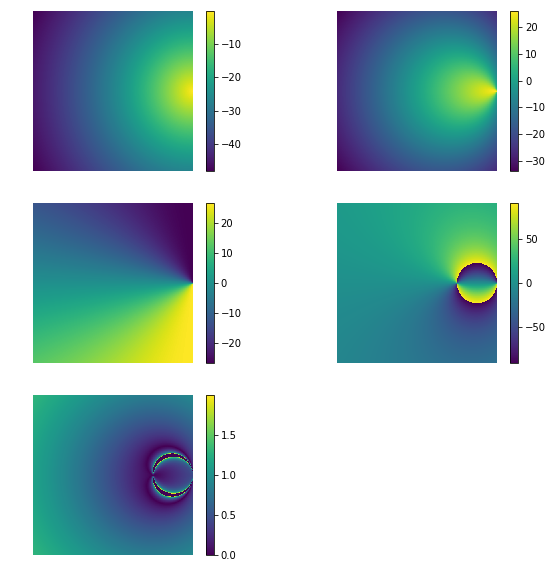

In [81]:
gl[gl>2]=0
plt.figure(figsize=(10,10))
r,c = 3,2
plt.subplot(r, c, 1)
plt.imshow(np.transpose(phi_in))
plt.colorbar()
plt.ylim([0,x])
plt.xlim([0,y])
plt.axis('off') 

plt.subplot(r, c, 2)
# phi_ot[phi_ot>0]=0
plt.imshow(np.transpose(phi_ot))
plt.colorbar()
plt.ylim([0,x])
plt.xlim([0,y])
plt.axis('off') 

plt.subplot(r, c, 3)
plt.imshow(np.transpose(the_ot))
plt.colorbar()
plt.ylim([0,x])
plt.xlim([0,y])
plt.axis('off') 

plt.subplot(r, c, 4)
plt.imshow(np.transpose(psi_ot))
plt.colorbar()
plt.ylim([0,x])
plt.xlim([0,y])
plt.axis('off')

plt.subplot(r, c, 5)
plt.imshow(np.transpose(gl))
plt.colorbar()
plt.ylim([0,x])
plt.xlim([0,y])
plt.axis('off') 